In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


2025-03-31 22:13:30.848997: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the trained model
model = tf.keras.models.load_model('efficientnet_b0_model.keras')

In [3]:
# Define test data directory
test_dir = 'archive/test'

In [4]:
# Data preprocessing (same as in training script)
test_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

In [5]:
test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Ensure order for evaluation
)

Found 336 images belonging to 2 classes.


In [6]:

# Make predictions
y_true = test_data.classes
y_scores = model.predict(test_data)
y_pred = (y_scores > 0.5).astype(int).flatten()

/home/subarna/Downloads/Project8Sem/MajorProject/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


In [7]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

In [8]:
# Compute metrics
acc = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred)

In [9]:
# Print results
print(f'Accuracy: {acc * 100:.2f}%')
print('Classification Report:\n', clr)

Accuracy: 70.24%
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       208
           1       0.60      0.66      0.63       128

    accuracy                           0.70       336
   macro avg       0.69      0.70      0.69       336
weighted avg       0.71      0.70      0.70       336



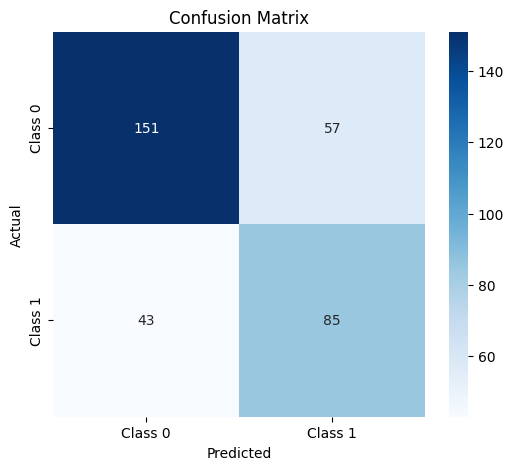

In [10]:

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, auc

# Precision-Recall Curve & Best Thresholds
y_true = test_data.classes
y_scores = model.predict(test_data).flatten()
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)

# Compute F1 Scores for each threshold
f1_scores = (2 * precision * recall) / (precision + recall + 1e-10)
best_f1_index = np.argmax(f1_scores)
best_threshold_f1 = thresholds[best_f1_index]

# Threshold for high precision
precision_threshold = thresholds[np.argmax(precision >= 0.9)] if np.any(precision >= 0.9) else None

# Threshold for high recall
recall_threshold = thresholds[np.argmax(recall >= 0.9)] if np.any(recall >= 0.9) else None

# Print threshold values
print(f'Best Threshold (Max F1): {best_threshold_f1:.4f}')
if precision_threshold:
    print(f'Threshold for Precision >= 0.9: {precision_threshold:.4f}')
if recall_threshold:
    print(f'Threshold for Recall >= 0.9: {recall_threshold:.4f}')



11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 986ms/step
Best Threshold (Max F1): 0.2917
Threshold for Precision >= 0.9: 0.9803
Threshold for Recall >= 0.9: 0.0000


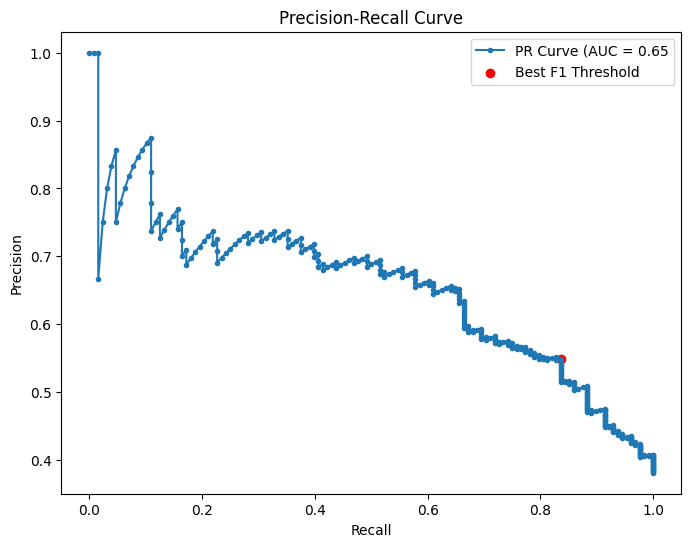

In [14]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f}')
plt.scatter(recall[best_f1_index], precision[best_f1_index], marker='o', color='red', label='Best F1 Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()